In [1]:
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
from datetime import datetime
import requests
import pandas as pd
import re

In [2]:
#(1) “코로나19” 키워드로 네이버 뉴스 기사 요약본 1,000개이상 크롤링

title_text=[]
link_text=[]
source_text=[] # 신문사 이름
contents_text=[]
result={}

In [3]:
#엑셀로 저장하기 위한 변수
RESULT_PATH ='./'  #결과 저장할 경로 (현재 디렉토리)

In [4]:
#내용 정제화 함수 
def contents_cleansing(contents):
    first_cleansing_contents = re.sub('<dl>.*?</a> </div> </dd> <dd>', '', 
                                      str(contents)).strip()  #앞에 필요없는 부분 제거
    second_cleansing_contents = re.sub('<ul class="relation_lst">.*?</dd>', '', 
                                       first_cleansing_contents).strip()#뒤에 필요없는 부분 제거 (새끼 기사)
    third_cleansing_contents = re.sub('<.+?>', '', second_cleansing_contents).strip()
    contents_text.append(third_cleansing_contents)

In [5]:
def crawler(maxpage,query,sort,s_date,e_date):

    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1  
    maxpage_t =(int(maxpage)-1)*10+1   # 페이지당 기사 10개 (ex.11= 2페이지)
    
    while page <= maxpage_t:
        url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort="+sort+"&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        
        response = requests.get(url)
        html = response.text
 
        #뷰티풀소프의 인자값 지정
        soup = BeautifulSoup(html, 'html.parser')
 
        #<a>태그에서 제목과 링크주소 추출
        atags = soup.select('._sp_each_title') # 속성으로 찾기
        for atag in atags:
            title_text.append(atag.text)     #제목
            link_text.append(atag['href'])   #링크주소
            
        #신문사 추출
        source_lists = soup.select('._sp_each_source')
        for source_list in source_lists:
            source_text.append(source_list.text)    
        
               
        #본문요약본
        contents_lists = soup.select('ul.type01 dl')
        for contents_list in contents_lists:
            contents_cleansing(contents_list) #본문요약 정제화
        
        
        #모든 리스트 딕셔너리형태로 저장
        result= {"title":title_text ,  "source" : source_text ,"contents": contents_text ,"link":link_text }  
        print(page)
        
        df = pd.DataFrame(result)  #df로 변환
        page += 10
             
    # 새로 만들 파일이름 지정
    outputFileName = '1번데이터.xlsx'
    df.to_excel(RESULT_PATH+outputFileName, sheet_name='sheet1')

In [6]:
def main():
    info_main = input("="*50+"\n"+"입력 형식에 맞게 입력해주세요."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    
    maxpage = input("최대 크롤링할 페이지 수 입력하시오: ")  
    query = input("검색어 입력: ")  
    sort = input("뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): ")    
    s_date = input("시작날짜 입력(2019.01.04):")  
    e_date = input("끝날짜 입력(2019.01.05):")   
    
    crawler(maxpage,query,sort,s_date,e_date) 
    
main()

입력 형식에 맞게 입력해주세요.
 시작하시려면 Enter를 눌러주세요.
최대 크롤링할 페이지 수 입력하시오: 110
검색어 입력: 코로나19
뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): 0
시작날짜 입력(2019.01.04):2020.02.01
끝날짜 입력(2019.01.05):2020.05.10
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991
1001
1011
1021
1031
1041
1051
1061
1071
1081
1091


In [7]:
contents_text

['감염증(코로나19) 확진자가 34명 증가했다. 신규 확진자 수가 30명대에 다시 진입한 건 4월 12일 32명 이후 28일 만이다. 신규 확진자 34명 중 26명은 국내 지역감염, 나머지 8명은 해외유입사례다....',
 '코로나19 사태로 중소기업 가운데 섬유 제품업과 숙박·음식점업 피해가 가장 심각하다는 조사 결과가 나왔습니다. 중소기업중앙회는 지난달 10일에서 23일 중소기업 1천 234곳을 대상으로 조사한 결과, 응답 기업의 76.2...',
 '금융감독원 직원 가족이 코로나19 확진 판정을 받으면서 금감원 건물 일부가 10일 폐쇄됐다. 금감원은 이날 “금감원 6층에 근무하는 직원의 가족이 코로나19 확진으로 확인돼 금감원 건물 중 해당 층 및 공용 공간인...',
 '정부가 신종 코로나바이러스감염증(COVID-19·코로나19)의 집단면역도와 무증상 감염 규모 파악을 위한 ‘항체가(면역도)’ 조사를 진행한다. 중앙재난안전대책본부는 코로나19 항체 보유율을 확인하고 10일 집단 내 면역...',
 '주요 비엔날레도 사실상 모두 연기 신종 코로나 바이러스 감염증(코로나19) 여파로 국내 최대 국제미술 행사인 광주비엔날레가 내년 2월로 연기됐다. 광주비엔날레재단은 "제13회 광주비엔날레를 예정보다 약 6개월...',
 '[중동·아프리카發 해외유입 환자↑] 방역당국이 앞으로 유럽·미국 외 지역 해외 입국자에 대해서도 코로나19(신종 코로나바이러스 감염증) 전수 검사를 시행한다. 질병관리본부 중앙방역대책본부(방대본)는 10일...',
 '미국의 ‘톱3 공중보건 당국자’가 코로나19 감염 우려로 정상적인 업무를 볼 수 없게 돼 미 행정부에 비상이 걸렸다. 백악관을 출입하며 고위 관리들과 접촉한 인사가 양성 판정을 받은 뒤, 코로나19 대응 콘트롤타워...',
 '코로나19 국내 감염자가 사흘 연속으로 10명 이상 발생했다. 서울 이태원 클럽에서 발생한 코로나19 집단감염이 확산되고 있는 데 따른 것이다. 질병관리본부 중앙방역대책본부는 10일 오전 0시 기준 코

In [11]:
#(2) 전처리는 본인이 필요하다고 생각되는 만큼 할 것
#(3) 형태소 분석기를 사용하여 명사만 추출

from konlpy.tag import Komoran
komoran_userdic = Komoran(userdic='./userdict.txt') #사용자 사전

noun_list = []

for sentence in contents_text:
    sentence = re.sub(pattern='[^\w\s]', repl='', string=sentence) #전처리
    nouns = komoran_userdic.nouns(sentence) #명사추출
    noun_list.append(nouns)
        
print(noun_list)    

[['감염증', '코로나19', '확진자', '명', '증가', '신규', '확진자', '수', '명', '대', '진입', '건', '4월 12일', '명', '이후', '일', '만', '신규', '확진자', '명', '중', '명', '국내', '지역', '감염', '나머지', '명', '해외', '유입', '사례'], ['코로나19', '사태', '중소기업', '가운데', '섬유', '제품', '업', '숙박', '음식점', '업', '피해', '조사', '결과', '중소기업중앙회', '지난달', '일', '일', '중소기업', '곳', '대상', '조사', '결과', '응답', '기업'], ['금융감독원', '직원', '가족', '코로나19', '확진', '판정', '금감원', '건물', '일부', '일', '폐쇄', '금감원', '이날', '금감원', '근무', '직원', '가족', '코로나19', '확진', '확인', '금감원', '건물', '중', '해당', '층', '공용', '공간'], ['정부', '신종', '코로나바이러스', '감염증', '코로나19', '집', '단면', '역도', '무증상', '감염', '규모', '파악', '항체', '가면', '역도', '조사', '진행', '중앙재난안전대책본부', '코로나19', '항체', '보유', '확인', '일', '집단', '면역'], ['비엔날레', '사실', '연기', '신종', '코로나', '바이러스', '감염증', '코로나19', '여파', '국내', '최대', '국제', '미술', '행사', '광주', '비엔날레', '내년', '2월', '연기', '광주', '비엔날레', '재단', '회', '광주', '비엔날레', '예정', '개월'], ['중', '동아프리카', '해외', '유입', '환자', '방역', '당국', '앞', '유럽', '미국', '외', '지역', '해외', '입국자', '코로나19', '신종', '코로나바이러스', '감염증', '전수', '검사', '시행', '

In [9]:
#(4) 언어 모델로 Term Frequency 사용

from sklearn.feature_extraction.text import CountVectorizer

for i in range(len(noun_list)):
    noun_list[i] = ' '.join(noun_list[i])
    
vec = CountVectorizer() #tf
X = vec.fit_transform(noun_list)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

df #군집화 가능한 형태

,0시,10,100,1000,10분,10월,10일,11월,12월,12일,...,휴업,휴일,휴전,휴직,흐름,흡연,흥덕구,희망,히데,힐링
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


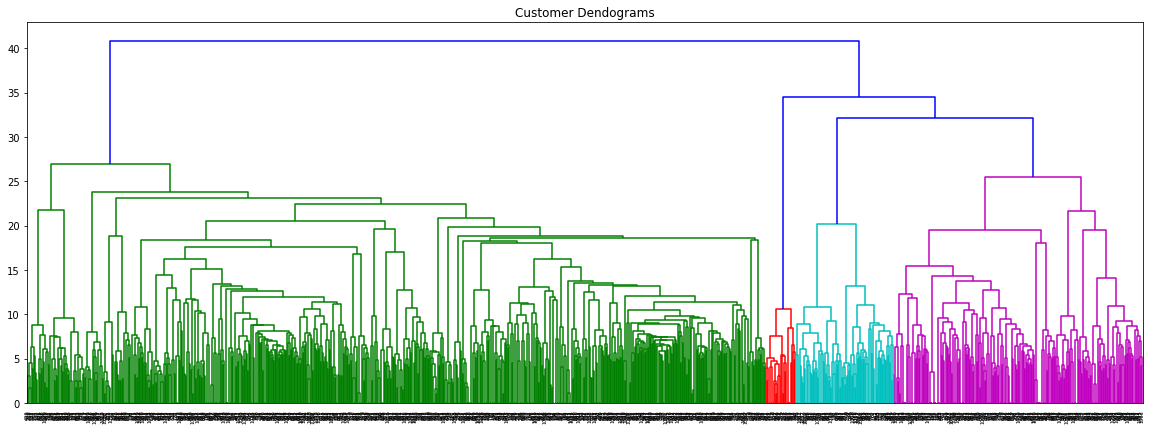

In [10]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [12]:
#(5) 최적의 토픽 개수 선정하여 토픽 모델링 실시 => 선정한 근거 (perplexity와 coherence 그래프 그리기)

from gensim import corpora, models

dictionary = corpora.Dictionary(noun_list)
print(dictionary) # 중복제외하고 나온 단어들 (unique)

Dictionary(3090 unique tokens: ['4월 12일', '감염', '감염증', '건', '국내']...)


In [13]:
corpus = [dictionary.doc2bow(nouns) for nouns in noun_list] # 새로 나오는 단어에 숫자를 할당하고 나올 때마다 빈도수 축적

print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3)], [(14, 2), (19, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1)], [(14, 1), (15, 1), (19, 2), (39, 2), (40, 2), (41, 1), (42, 1), (43, 1), (44, 4), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2)], [(1, 1), (2, 1), (14, 1), (19, 2), (34, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2)], [(2, 1), (4, 1), (19, 1), (61, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 4), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(2, 1), (12, 1), (14, 1), (15, 1), (17, 1), (19, 1), (20, 2), (61, 1), (68,

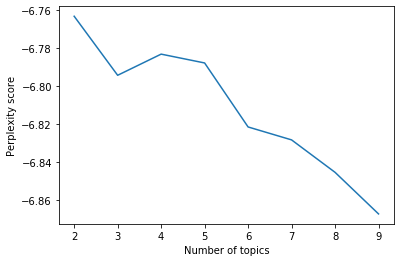

In [14]:
#혼잡도

import gensim

perplexity_values = []
for i in range(2,10):              # num_topics=i에 2~9까지 넣어보면서 복잡도 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary) 
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()    

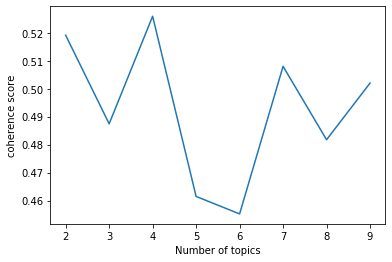

In [15]:
# 주제 일관성

from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,10):              # num_topics=i에 2~9까지 넣어보면서 주제일관성 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=noun_list, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()    

In [22]:
#(6) 토픽 모델링이 적절한지 시각화하여 확인

import pyLDAvis.gensim as gensimvis

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=7, id2word = dictionary) #복잡도와 주제일관성 그래프를 토대로 최적 토픽 개수는 7개
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.display(prepared_data)

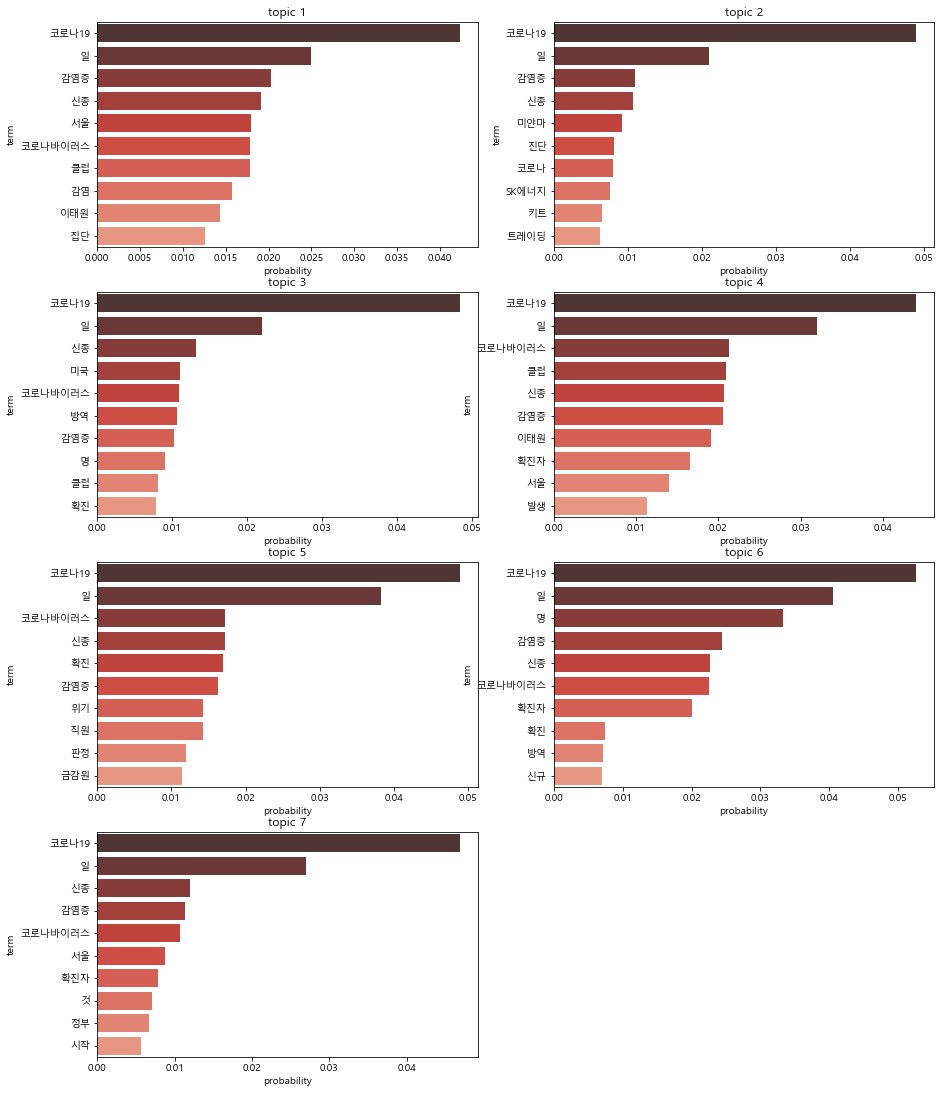

In [23]:
#(7) 상위 키워드를 기준으로 각 토픽에 주제 지정

import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fiz=plt.figure(figsize=(15,24))
for i in range(7):
    df=pd.DataFrame(ldamodel.show_topic(i), columns=['term','prob']).set_index('term')

    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()

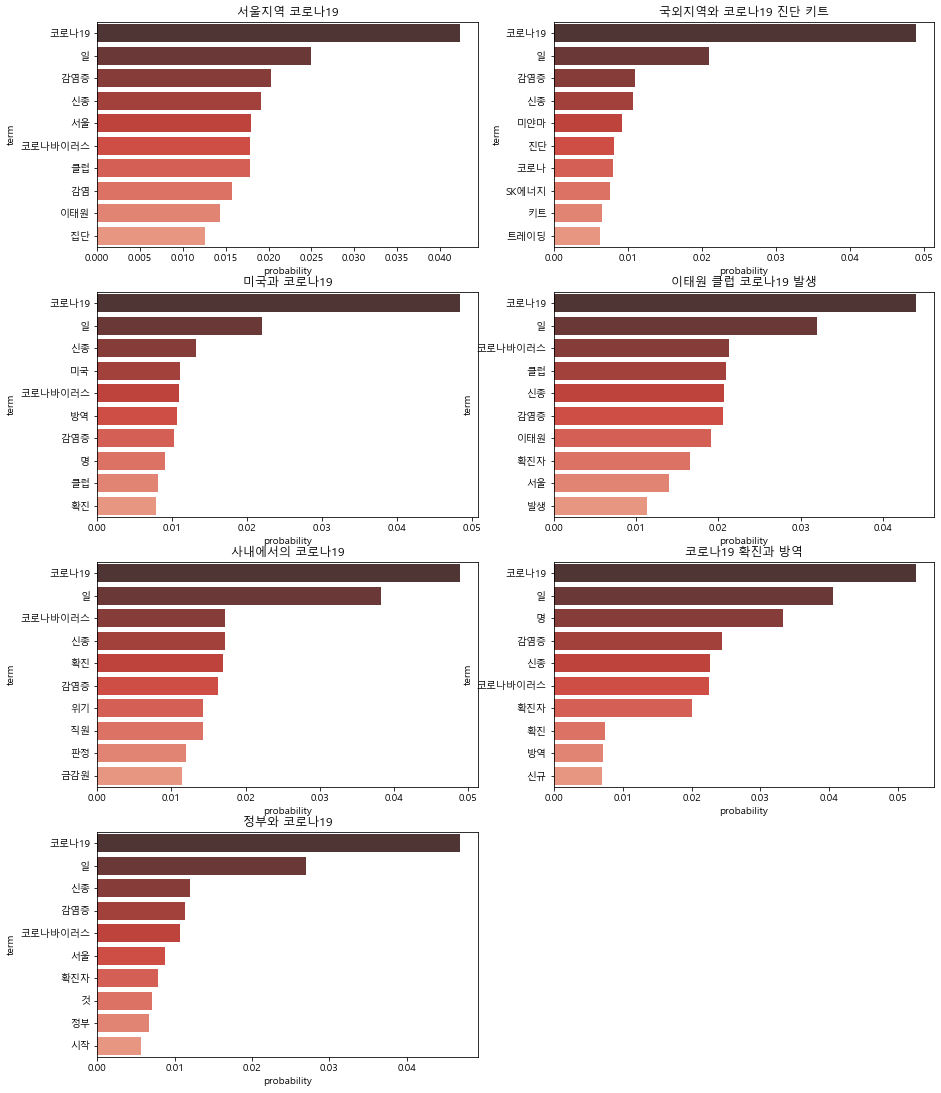

In [24]:
%matplotlib inline

topics = ['서울지역 코로나19', '국외지역와 코로나19 진단 키트', '미국과 코로나19', '이태원 클럽 코로나19 발생', '사내에서의 코로나19', '코로나19 확진과 방역', '정부와 코로나19']

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fiz=plt.figure(figsize=(15,24))
for i in range(7):
    df=pd.DataFrame(ldamodel.show_topic(i), columns=['term','prob']).set_index('term')

    plt.subplot(5,2,i+1)
    plt.title(topics[i])
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()